In [15]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from DCA import remove_outlier, arps_fit

In [2]:
df = pd.read_excel('production_data.xlsx')
df.head()

,Date,Monthly oil production,monthly gas production,monthly water production
0,1963-11-30,49569.962851,13.913977,25.159226
1,1963-12-31,81591.371392,22.919216,44.028646
2,1964-01-31,81497.024292,22.883901,50.318453
3,1964-02-29,76138.109058,21.365371,44.028646
4,1964-03-31,71301.247772,19.988099,37.738840


In [3]:
df = df[["Date", "Monthly oil production"]]
df.head()

,Date,Monthly oil production
0,1963-11-30,49569.962851
1,1963-12-31,81591.371392
2,1964-01-31,81497.024292
3,1964-02-29,76138.109058
4,1964-03-31,71301.247772


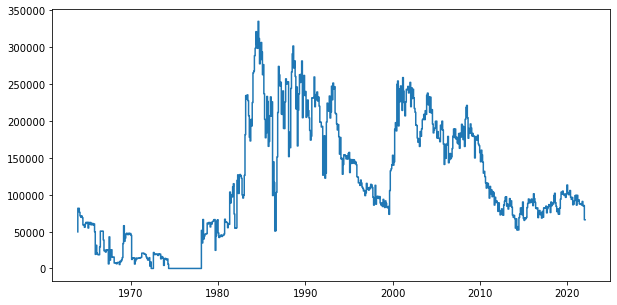

In [4]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.step(df["Date"], df["Monthly oil production"])
plt.show()

In [5]:
df=df.set_index('Date')
df=df.assign(Date=df.index.get_level_values('Date'))
df.head() 

,Monthly oil production,Date
Date,,
1963-11-30,49569.962851,1963-11-30
1963-12-31,81591.371392,1963-12-31
1964-01-31,81497.024292,1964-01-31
1964-02-29,76138.109058,1964-02-29
1964-03-31,71301.247772,1964-03-31


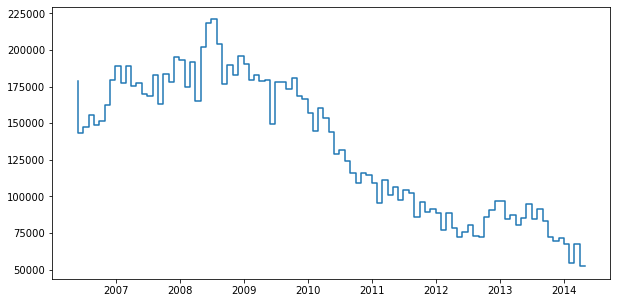

In [10]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.step(df['2006-05-01' :'2014-05-01'].index ,df["Monthly oil production"]['2006-05-01' :'2014-05-01'])
plt.show()

In [11]:
# Removing outliers (window=150, num_stdev=50)
df=df['2004-01-01' :'2014-05-01']
result = remove_outlier(df, "Monthly oil production", 50, 50, trim=True)
result.head()

,Monthly oil production,Date,Monthly oil production_rol_Av,Monthly oil production_rol_Std,Monthly oil production_is_Outlier
0,191971.187654,2008-03-31,175782.734984,17581.075492,False
1,165321.277032,2008-04-30,175876.327306,17448.875864,False
2,202255.021467,2008-05-31,175421.322696,17977.509316,False
3,218331.767171,2008-06-30,174616.856430,19116.473568,False
4,220986.065562,2008-07-31,173670.240535,20046.091576,False


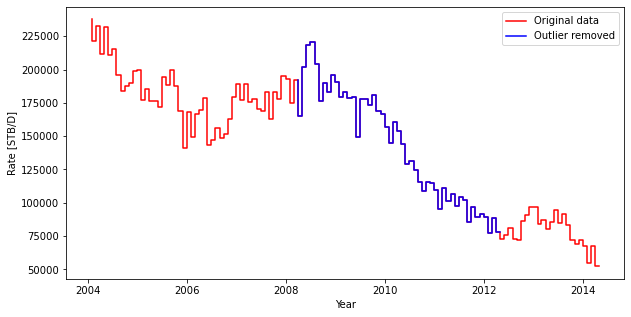

In [12]:
# Plot outlier-removed oil production rate, compare w/ original
plt.figure(figsize=(10,5))
plt.step(df.index, df["Monthly oil production"], color="red", label="Original data")
plt.step(result["Date"], result["Monthly oil production"], color="blue", label="Outlier removed")
plt.xlabel("Year"); plt.ylabel("Rate [STB/D]")

plt.legend()
plt.show()

Initial production rate (qi)  : 209146.23057 VOL/D
Initial decline rate (di)     : 0.00040 VOL/D
Decline coefficient (b)       : -1.21007
RMSE of regression            : 0.00013


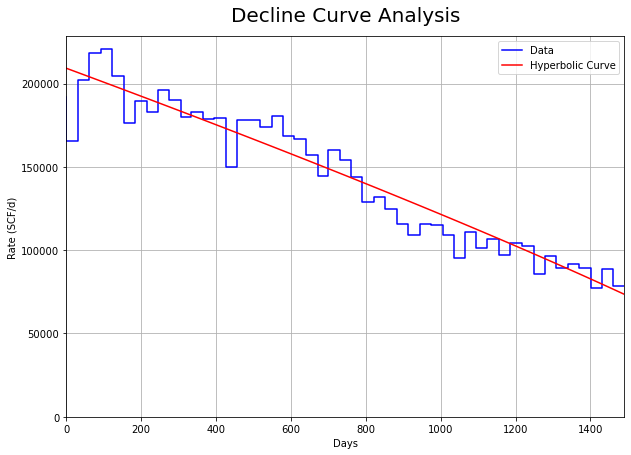

(209146.23056806566,
 0.0003979595607969457,
 -1.2100693526160453,
 0.0001307110476962583)

In [14]:
t = result["Date"]
q = result["Monthly oil production"]
# Decline curve analysis
arps_fit(t, q, plot=True)